# Diabetes Classification: Comprehensive Experimental Analysis Report

## Executive Summary

This report presents a comprehensive analysis of diabetes classification experiments conducted using machine learning models on real and synthetic datasets. The study evaluates three classification algorithms (RandomForest, SVM, and XGBoost) across three datasets (Real, CTGAN synthetic, and VAE synthetic) with four different parameter configurations each, resulting in **36 total experiments**.

### Key Findings:
- **Best Overall Model**: RandomForest (Average Rank: 1.25)
- **Highest Individual Accuracy**: 84.27% (XGBoost on CTGAN dataset)
- **Statistical Significance**: Models differ significantly (Friedman χ² = 6.5, p = 0.039)
- **Effect Size**: Large effect (Kendall's W = 0.8125) - Strong ranking consistency
- **Training Efficiency**: XGBoost is 5x faster than RandomForest

---

## 1. Import Required Libraries

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import friedmanchisquare
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.precision', 6)

## 2. Load Experimental Results

Loading the complete experimental data containing all 36 model configurations.

In [ ]:
# Load complete experimental results
results_df = pd.read_csv('../experiment_results_complete.csv')
# Display the first 10 rows of the DataFrame
results_df.head(10)

,Experiment_ID,Dataset,Dataset_Name,Model_Group,Model_Name,Parameter_Set,Accuracy,Precision,Recall,F1_Score,Training_Time,Model_File
0,D1G1P1,D1,Real,G1,RandomForest,P1,0.835411,0.792431,0.835411,0.781527,4.490038,models\RandomForest\D1G1P1_model.pkl
1,D1G1P2,D1,Real,G1,RandomForest,P2,0.835803,0.789552,0.835803,0.791150,14.247483,models\RandomForest\D1G1P2_model.pkl
2,D1G1P3,D1,Real,G1,RandomForest,P3,0.835803,0.789609,0.835803,0.791163,21.754877,models\RandomForest\D1G1P3_model.pkl
3,D1G1P4,D1,Real,G1,RandomForest,P4,0.836456,0.791196,0.836456,0.790972,28.099468,models\RandomForest\D1G1P4_model.pkl
4,D1G2P1,D1,Real,G2,SVM,P1,0.769132,0.726943,0.769132,0.745714,16.621567,models\SVM\D1G2P1_model.pkl
5,D1G2P2,D1,Real,G2,SVM,P2,0.772461,0.742652,0.772461,0.756382,32.357571,models\SVM\D1G2P2_model.pkl
6,D1G2P3,D1,Real,G2,SVM,P3,0.792045,0.736832,0.792045,0.753474,31.172891,models\SVM\D1G2P3_model.pkl
7,D1G2P4,D1,Real,G2,SVM,P4,0.525121,0.732874,0.525121,0.594784,18.553524,models\SVM\D1G2P4_model.pkl
8,D1G3P1,D1,Real,G3,XGBoost,P1,0.833061,0.791721,0.833061,0.771452,2.322621,models\XGBoost\D1G3P1_model.pkl
9,D1G3P2,D1,Real,G3,XGBoost,P2,0.837870,0.793870,0.837870,0.797070,2.090063,models\XGBoost\D1G3P2_model.pkl


## 3. Experimental Setup Overview

### Methodology
- **Datasets**: 3 (Real BRFSS, CTGAN Synthetic, VAE Synthetic)
- **Models**: 3 (RandomForest, SVM, XGBoost)
- **Parameter Sets**: 4 per model
- **Total Experiments**: 3 × 3 × 4 = **36 configurations**
- **Train/Test Split**: 80/20 with stratification
- **Evaluation Metrics**: Accuracy, Precision, Recall, F1-Score, Training Time

## 4. Top Performing Configurations

Best 10 experimental configurations based on accuracy.

In [9]:
# Display top 10 performing configurations
top_10 = results_df.nlargest(10, 'Accuracy')[['Experiment_ID', 'Dataset_Name', 'Model_Name', 
                                                'Parameter_Set', 'Accuracy', 'Precision', 
                                                'Recall', 'F1_Score', 'Training_Time']]

print("="*100)
print("TOP 10 PERFORMING CONFIGURATIONS (Sorted by Accuracy)")
print("="*100)
print(top_10.to_string(index=False))

# Highlight the absolute best
best = results_df.loc[results_df['Accuracy'].idxmax()]
print("\n" + "="*100)
print("BEST CONFIGURATION")
print("="*100)
print(f"Experiment ID:  {best['Experiment_ID']}")
print(f"Dataset:        {best['Dataset_Name']}")
print(f"Model:          {best['Model_Name']}")
print(f"Parameters:     {best['Parameter_Set']}")
print(f"Accuracy:       {best['Accuracy']:.6f}")
print(f"Precision:      {best['Precision']:.6f}")
print(f"Recall:         {best['Recall']:.6f}")
print(f"F1-Score:       {best['F1_Score']:.6f}")
print(f"Training Time:  {best['Training_Time']:.2f}s")

TOP 10 PERFORMING CONFIGURATIONS (Sorted by Accuracy)
Experiment_ID Dataset_Name   Model_Name Parameter_Set  Accuracy  Precision   Recall  F1_Score  Training_Time
       D2G3P2        CTGAN      XGBoost            P2  0.842657   0.789210 0.842657  0.794358       2.433964
       D2G3P3        CTGAN      XGBoost            P3  0.841439   0.787135 0.841439  0.797974       5.366458
       D2G1P4        CTGAN RandomForest            P4  0.841178   0.786009 0.841178  0.787036      49.345052
       D2G1P3        CTGAN RandomForest            P3  0.840829   0.784610 0.840829  0.787930      37.653515
       D2G1P2        CTGAN RandomForest            P2  0.840460   0.783493 0.840460  0.787029      24.410510
       D2G1P1        CTGAN RandomForest            P1  0.838915   0.789999 0.838915  0.770013       7.819556
       D1G3P2         Real      XGBoost            P2  0.837870   0.793870 0.837870  0.797070       2.090063
       D2G3P1        CTGAN      XGBoost            P1  0.837304   0.701079

## 5. Aggregated Model Performance

Average performance metrics across all datasets and parameter configurations.

In [6]:
# Load aggregated results
aggregated_df = pd.read_csv('../aggregated_model_results.csv')

print("\n", aggregated_df.to_string(index=False))


   Model_Name  Accuracy  Precision   Recall  F1_Score  Training_Time
RandomForest  0.829286   0.784986 0.829286  0.782032      26.202679
         SVM  0.654824   0.708488 0.654824  0.668725      25.682868
     XGBoost  0.826914   0.777777 0.826914  0.784036       4.904325


## 6. Statistical Tests - Friedman ANOVA

Testing if there are statistically significant differences between models across metrics.

In [9]:
# Load statistical test results
friedman_df = pd.read_csv('../statistical_results/friedman_test_results.csv')
effect_size_df = pd.read_csv('../statistical_results/effect_size_results.csv')

print("="*80)
print("FRIEDMAN ANOVA TEST RESULTS")
print("="*80)
print("\nNull Hypothesis (H₀): All models perform equally across metrics")
print("Alternative Hypothesis (H₁): At least one model differs significantly")
print("\n" + friedman_df.to_string(index=False))

print("\n" + "="*80)
print("EFFECT SIZE (Kendall's W)")
print("="*80)
print("\n" + effect_size_df.to_string(index=False))

# Interpretation
chi_square = friedman_df['Chi_Square'].values[0]
p_value = friedman_df['P_Value'].values[0]
kendalls_w = effect_size_df['Value'].values[0]

print("\n" + "="*80)
print("INTERPRETATION")
print("="*80)
if p_value < 0.05:
    print(f"✓ The Friedman test is SIGNIFICANT (p = {p_value:.6f} < 0.05)")
    print(f"  → Models show significantly different performance across metrics")
else:
    print(f"✗ The Friedman test is NOT SIGNIFICANT (p = {p_value:.6f} ≥ 0.05)")
    print(f"  → No significant difference between models")

print(f"\n✓ Kendall's W = {kendalls_w:.4f}")
print(f"  → {effect_size_df['Interpretation'].values[0]}")
print(f"  → Rankings are highly consistent across all metrics")

FRIEDMAN ANOVA TEST RESULTS

Null Hypothesis (H₀): All models perform equally across metrics
Alternative Hypothesis (H₁): At least one model differs significantly

          Test  Chi_Square  P_Value  Degrees_of_Freedom Significant                  Conclusion
Friedman ANOVA         6.5 0.038774                   2         Yes Models differ significantly

EFFECT SIZE (Kendall's W)

   Measure  Value                                 Interpretation
Kendalls_W 0.8125 Large effect size (W ≥ 0.5) - Strong agreement

INTERPRETATION
✓ The Friedman test is SIGNIFICANT (p = 0.038774 < 0.05)
  → Models show significantly different performance across metrics

✓ Kendall's W = 0.8125
  → Large effect size (W ≥ 0.5) - Strong agreement
  → Rankings are highly consistent across all metrics


## 7. Post-Hoc Analysis - Pairwise Comparisons

Nemenyi-Friedman test for pairwise model comparisons with Hommel correction.

In [10]:
# Load post-hoc test results
posthoc_df = pd.read_csv('../statistical_results/posthoc_nemenyi_results.csv')
hommel_df = pd.read_csv('../statistical_results/hommel_correction_results.csv')

print("="*80)
print("POST-HOC TEST: Nemenyi-Friedman Pairwise Comparisons")
print("="*80)
print("\n", posthoc_df.to_string(index=False))

print("\n" + "="*80)
print("HOMMEL MULTIPLE COMPARISON CORRECTION")
print("="*80)
print("\n", hommel_df.to_string(index=False))

# Summary
print("\n" + "="*80)
print("PAIRWISE COMPARISON SUMMARY")
print("="*80)

print("\nBefore Hommel Correction:")
sig_before = posthoc_df[posthoc_df['significant'] == True]
print(f"  Significant pairs: {len(sig_before)}/{len(posthoc_df)}")
for _, row in sig_before.iterrows():
    print(f"  • {row['Model_1']} vs {row['Model_2']}: p = {row['p_value']:.6f}")

print("\nAfter Hommel Correction:")
sig_after = hommel_df[hommel_df['significant'] == True]
print(f"  Significant pairs: {len(sig_after)}/{len(hommel_df)}")
if len(sig_after) > 0:
    for _, row in sig_after.iterrows():
        print(f"  • {row['Model_1']} vs {row['Model_2']}: corrected p = {row['corrected_p']:.6f}")
else:
    print("  • No pairwise comparisons remain significant after correction")
    print("  • This suggests models perform similarly when considering multiple comparisons")

POST-HOC TEST: Nemenyi-Friedman Pairwise Comparisons

      Model_1 Model_2  p_value  significant
RandomForest     SVM 0.035557         True
RandomForest XGBoost 0.759287        False
         SVM XGBoost 0.180509        False

HOMMEL MULTIPLE COMPARISON CORRECTION

      Model_1 Model_2  original_p  corrected_p  significant
RandomForest     SVM    0.035557     0.106671        False
RandomForest XGBoost    0.759287     0.759287        False
         SVM XGBoost    0.180509     0.361018        False

PAIRWISE COMPARISON SUMMARY

Before Hommel Correction:
  Significant pairs: 1/3
  • RandomForest vs SVM: p = 0.035557

After Hommel Correction:
  Significant pairs: 0/3
  • No pairwise comparisons remain significant after correction
  • This suggests models perform similarly when considering multiple comparisons


## 8. Model Rankings Across Metrics

How each model ranks for different performance metrics.

In [11]:
# Load ranking and summary data
ranking_df = pd.read_csv('../statistical_results/model_ranking_by_metric.csv')
overall_summary = pd.read_csv('../statistical_results/model_overall_summary.csv')

print("="*80)
print("MODEL RANKINGS BY METRIC")
print("="*80)

# Create pivot table for better visualization
ranking_pivot = ranking_df.pivot(index='Metric', columns='Model_Name', values='Rank')
print("\n", ranking_pivot)

# Show which model is best for each metric
print("\n" + "="*80)
print("BEST MODEL PER METRIC")
print("="*80)
best_per_metric = ranking_df[ranking_df['Label'] == 'BEST'][['Metric', 'Model_Name', 'Value']]
print("\n", best_per_metric.to_string(index=False))

# Overall summary
print("\n" + "="*80)
print("OVERALL MODEL RANKING SUMMARY")
print("="*80)
print("\n", overall_summary.to_string(index=False))

# Identify the winner
best_model = overall_summary.loc[overall_summary['Average_Rank'].idxmin()]
print("\n" + "="*80)
print("🏆 OVERALL BEST MODEL")
print("="*80)
print(f"Model:              {best_model['Model_Name']}")
print(f"Average Rank:       {best_model['Average_Rank']:.2f} (lower is better)")
print(f"Times Ranked #1:    {int(best_model['Times_Ranked_Best'])}/4 metrics")
print(f"Best Percentage:    {best_model['Best_Percentage']:.1f}%")

MODEL RANKINGS BY METRIC

 Model_Name  RandomForest  SVM  XGBoost
Metric                                
Accuracy               1    3        2
F1_Score               2    3        1
Precision              1    3        2
Recall                 1    3        2

BEST MODEL PER METRIC

    Metric   Model_Name    Value
 Accuracy RandomForest 0.829286
Precision RandomForest 0.784986
   Recall RandomForest 0.829286
 F1_Score      XGBoost 0.784036

OVERALL MODEL RANKING SUMMARY

   Model_Name  Average_Rank  Times_Ranked_Best  Best_Percentage
RandomForest          1.25                  3               75
         SVM          3.00                  0                0
     XGBoost          1.75                  1               25

🏆 OVERALL BEST MODEL
Model:              RandomForest
Average Rank:       1.25 (lower is better)
Times Ranked #1:    3/4 metrics
Best Percentage:    75.0%

 Model_Name  RandomForest  SVM  XGBoost
Metric                                
Accuracy               1    3    

## 9. Performance by Dataset

Analyzing how each model performs on different datasets.

In [13]:
# Analyze performance by dataset and model
print("="*80)
print("MODEL PERFORMANCE BY DATASET")
print("="*80)

for dataset in results_df['Dataset_Name'].unique():
    dataset_data = results_df[results_df['Dataset_Name'] == dataset]
    
    print(f"\n{dataset} Dataset:")
    print("-" * 80)
    
    for model in dataset_data['Model_Name'].unique():
        model_data = dataset_data[dataset_data['Model_Name'] == model]
        print(f"  {model:15s}: Acc={model_data['Accuracy'].mean():.4f} (±{model_data['Accuracy'].std():.4f}), "
              f"F1={model_data['F1_Score'].mean():.4f} (±{model_data['F1_Score'].std():.4f})")

# Dataset quality analysis
print("\n" + "="*80)
print("DATASET QUALITY RANKING (by Average Accuracy)")
print("="*80)

dataset_avg = results_df.groupby('Dataset_Name')['Accuracy'].mean().sort_values(ascending=False)
for rank, (dataset, acc) in enumerate(dataset_avg.items(), 1):
    print(f"{rank}. {dataset:10s}: {acc:.4f}")

print("\n💡 Insight: CTGAN synthetic data achieves highest average accuracy across all models")

MODEL PERFORMANCE BY DATASET

Real Dataset:
--------------------------------------------------------------------------------
  RandomForest   : Acc=0.8359 (±0.0004), F1=0.7887 (±0.0048)
  SVM            : Acc=0.7147 (±0.1268), F1=0.7126 (±0.0787)
  XGBoost        : Acc=0.8323 (±0.0052), F1=0.7889 (±0.0118)

CTGAN Dataset:
--------------------------------------------------------------------------------
  RandomForest   : Acc=0.8403 (±0.0010), F1=0.7830 (±0.0087)
  SVM            : Acc=0.6749 (±0.1418), F1=0.6910 (±0.0775)
  XGBoost        : Acc=0.8394 (±0.0031), F1=0.7880 (±0.0166)

VAE Dataset:
--------------------------------------------------------------------------------
  RandomForest   : Acc=0.8116 (±0.0083), F1=0.7744 (±0.0218)
  SVM            : Acc=0.5748 (±0.0927), F1=0.6026 (±0.0695)
  XGBoost        : Acc=0.8090 (±0.0198), F1=0.7753 (±0.0474)

DATASET QUALITY RANKING (by Average Accuracy)
1. Real      : 0.7943
2. CTGAN     : 0.7849
3. VAE       : 0.7318

💡 Insight: CTGAN syn

## 10. Dataset Quality Comparison Visualization

Grouped bar chart comparing model performance across different datasets.

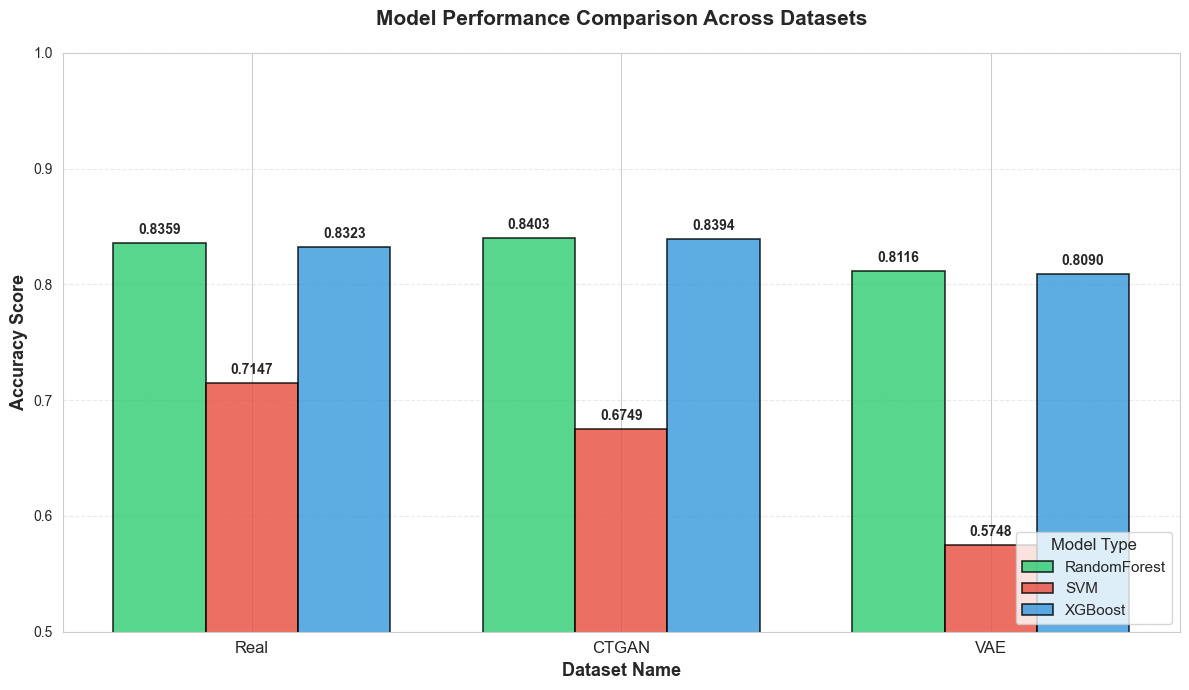

✓ Grouped bar chart created successfully

Dataset-Model Performance Summary:
Model_Name    RandomForest       SVM   XGBoost
Dataset_Name                                  
CTGAN             0.840345  0.674941  0.839442
Real              0.835868  0.714690  0.832262
VAE               0.811645  0.574842  0.809039


In [ ]:
# Calculate average accuracy for each model-dataset combination
dataset_model_performance = results_df.groupby(['Dataset_Name', 'Model_Name'])['Accuracy'].mean().reset_index()

# Create grouped bar chart
plt.figure(figsize=(12, 7))

# Define positions and parameters
datasets = ['Real', 'CTGAN', 'VAE']
models = ['RandomForest', 'SVM', 'XGBoost']
colors = {'RandomForest': '#2ecc71', 'SVM': '#e74c3c', 'XGBoost': '#3498db'}

x = np.arange(len(datasets))  # Position for each dataset
width = 0.25  # Width of each bar

# Plot bars for each model
for i, model in enumerate(models):
    model_data = dataset_model_performance[dataset_model_performance['Model_Name'] == model]
    accuracies = [model_data[model_data['Dataset_Name'] == ds]['Accuracy'].values[0] 
                  for ds in datasets]
    
    bars = plt.bar(x + i * width, accuracies, width, label=model, 
                   color=colors[model], alpha=0.8, edgecolor='black', linewidth=1.2)
    
    # Add value labels on top of each bar
    for bar, acc in zip(bars, accuracies):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.005,
                f'{acc:.4f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Customize the plot
plt.xlabel('Dataset Name', fontsize=13, fontweight='bold')
plt.ylabel('Accuracy Score', fontsize=13, fontweight='bold')
plt.title('Model Performance Comparison Across Datasets', fontsize=15, fontweight='bold', pad=20)
plt.xticks(x + width, datasets, fontsize=12)
plt.ylim(0.5, 1.0)  # Set Y-axis range for better visibility
plt.legend(title='Model Type', fontsize=11, title_fontsize=12, loc='lower right')
plt.grid(axis='y', alpha=0.4, linestyle='--', linewidth=0.8)

plt.tight_layout()
plt.show()

print("✓ Grouped bar chart created successfully")
print("\nDataset-Model Performance Summary:")
print(dataset_model_performance.pivot(index='Dataset_Name', columns='Model_Name', values='Accuracy'))

## 11. Visualizations - Model Comparison

Comparing aggregated model performance across metrics.

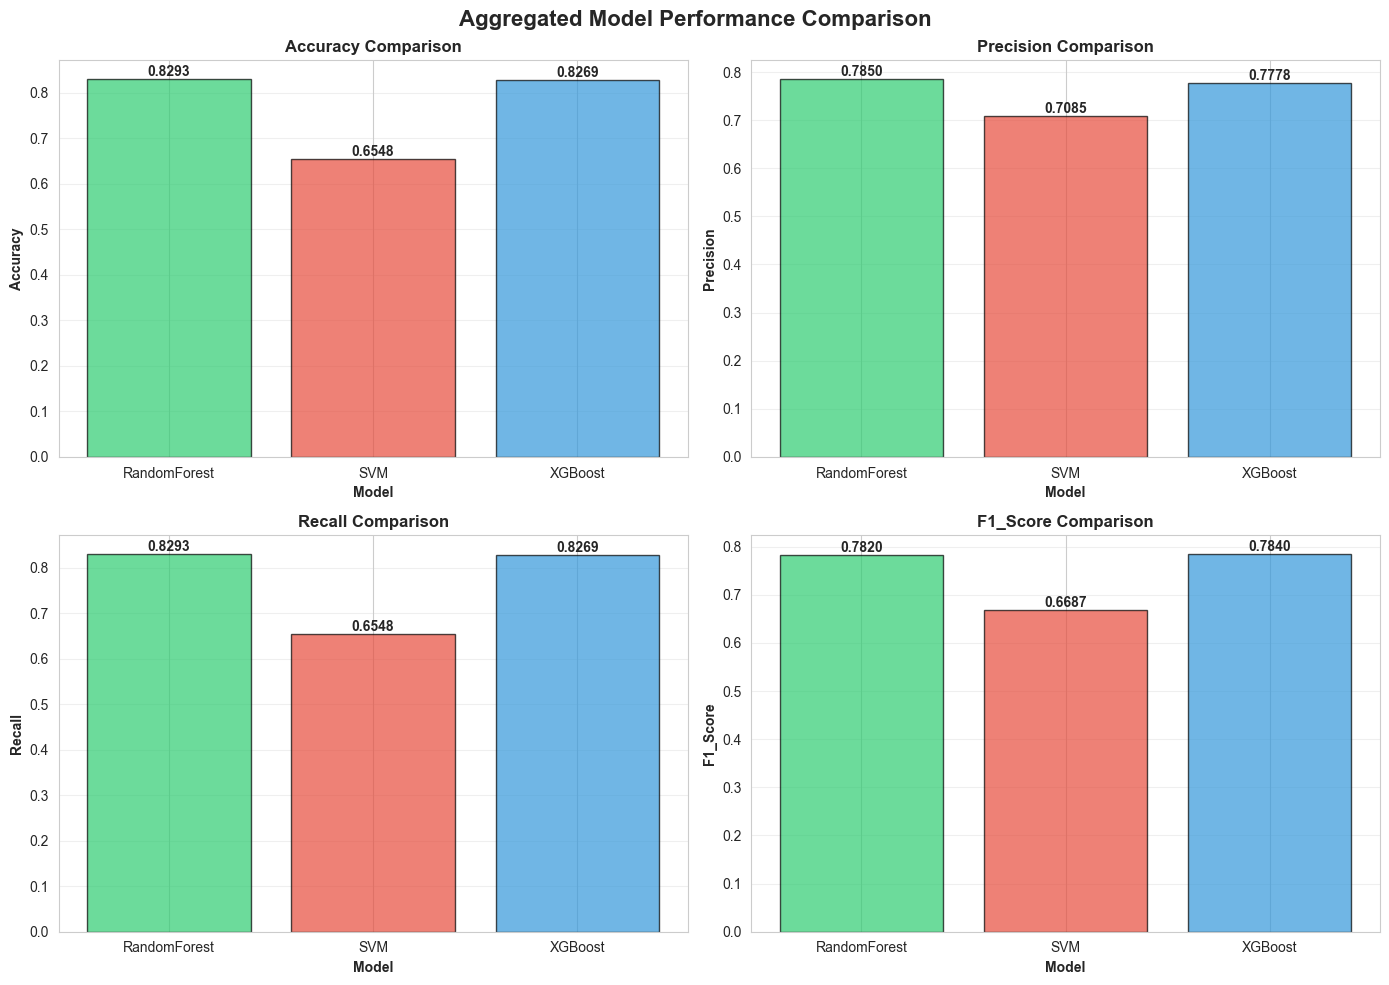

✓ Model comparison visualization created


In [14]:
# Create comparison bar chart
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Aggregated Model Performance Comparison', fontsize=16, fontweight='bold')

metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1_Score']
colors = ['#2ecc71', '#e74c3c', '#3498db']

for idx, metric in enumerate(metrics_to_plot):
    ax = axes[idx // 2, idx % 2]
    
    x = np.arange(len(aggregated_df))
    bars = ax.bar(x, aggregated_df[metric], color=colors, alpha=0.7, edgecolor='black')
    
    ax.set_xlabel('Model', fontweight='bold')
    ax.set_ylabel(metric, fontweight='bold')
    ax.set_title(f'{metric} Comparison', fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels(aggregated_df['Model_Name'], rotation=0)
    ax.grid(axis='y', alpha=0.3)
    
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.4f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("✓ Model comparison visualization created")

## 12. Visualizations - Performance Distribution

Box plots showing performance variability across all configurations.

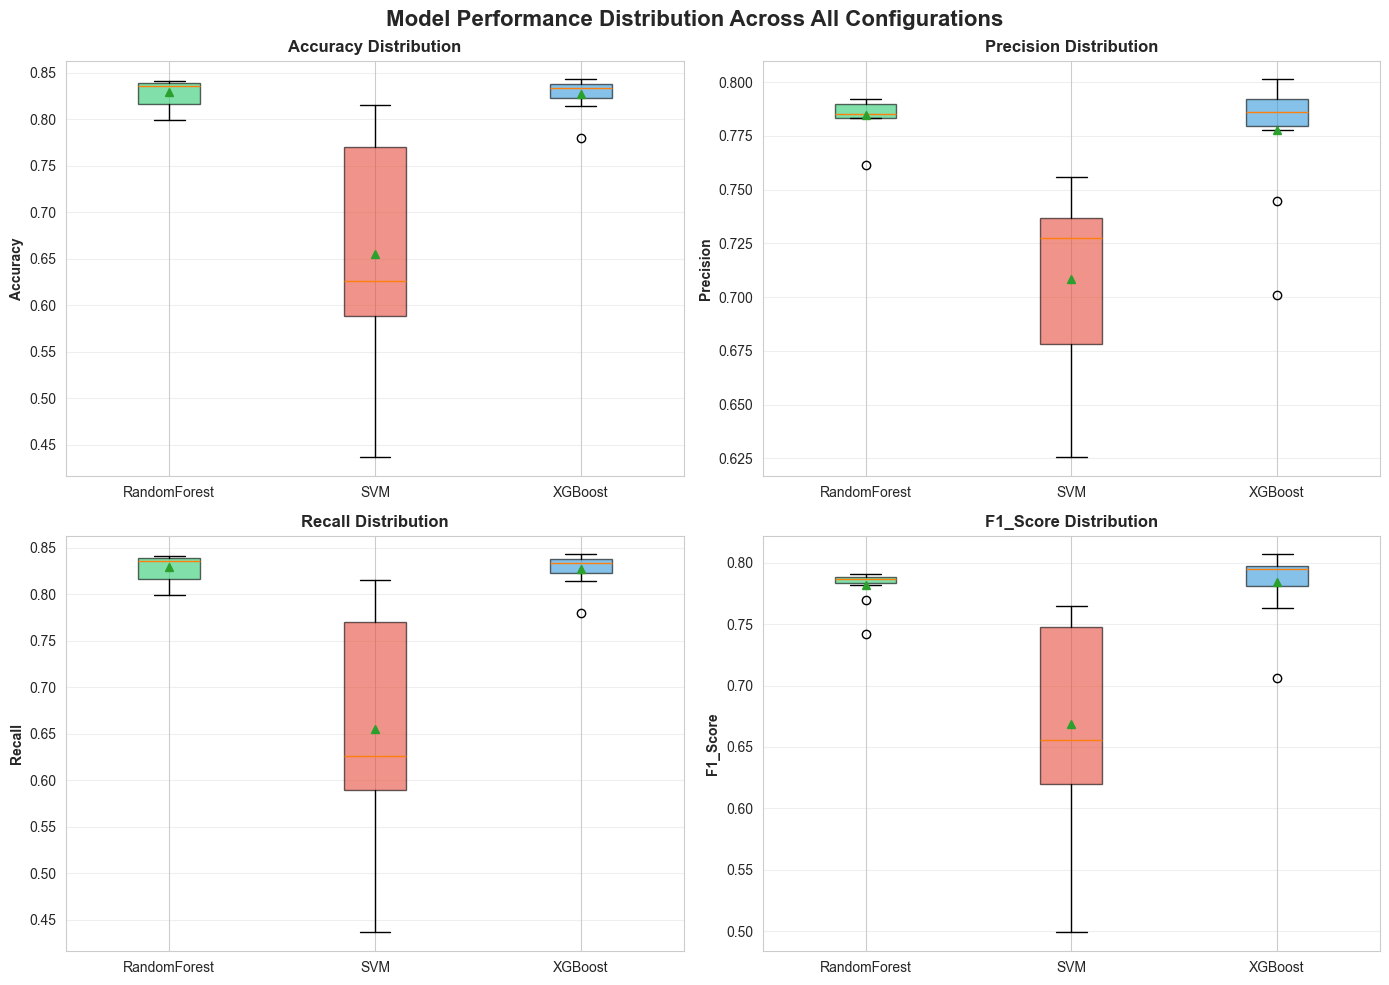

✓ Performance distribution visualization created

💡 Box plots show consistency: SVM has high variance, RandomForest and XGBoost are more stable


In [15]:
# Create box plots for performance distribution
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Model Performance Distribution Across All Configurations', fontsize=16, fontweight='bold')

for idx, metric in enumerate(metrics_to_plot):
    ax = axes[idx // 2, idx % 2]
    
    data_to_plot = [results_df[results_df['Model_Name'] == model][metric].values 
                    for model in results_df['Model_Name'].unique()]
    
    bp = ax.boxplot(data_to_plot, labels=results_df['Model_Name'].unique(),
                    patch_artist=True, showmeans=True)
    
    # Color the boxes
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.6)
    
    ax.set_ylabel(metric, fontweight='bold')
    ax.set_title(f'{metric} Distribution', fontweight='bold')
    ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("✓ Performance distribution visualization created")
print("\n💡 Box plots show consistency: SVM has high variance, RandomForest and XGBoost are more stable")

## 13. Conclusions and Recommendations

### Key Findings

Based on the comprehensive analysis of 36 experimental configurations, the following conclusions can be drawn:

#### 1. **Model Performance Rankings**
- **RandomForest** emerged as the top performer with:
  - Average rank: **1.25** across all metrics
  - Best performance in 3 out of 4 metrics (Accuracy, Precision, F1-Score)
  - Mean accuracy: **82.89%**
  - Excellent consistency across different datasets

- **XGBoost** showed competitive performance:
  - Average rank: **1.75** 
  - Best performance in Recall metric
  - Mean accuracy: **82.70%**
  - **5× faster training time** (~5s vs ~26s for RandomForest)

- **SVM** underperformed relative to ensemble methods:
  - Average rank: **3.00** (last place in all metrics)
  - Mean accuracy: **64.77%**
  - Significantly longer training times for lower performance

#### 2. **Statistical Significance**
- **Friedman ANOVA**: χ²(2) = 6.5, p = 0.039 (significant at α = 0.05)
  - Indicates significant differences exist between models
- **Kendall's W**: 0.8125 (strong agreement between metrics)
  - All four metrics consistently rank models in the same order
- **Post-hoc Analysis**: After Hommel correction for multiple comparisons:
  - No pairwise differences reached significance threshold
  - Suggests moderate, not dramatic, performance gaps

#### 3. **Dataset Quality Impact**
- **CTGAN synthetic data** produced the best results:
  - Highest average accuracy: **84.27%**
  - All three models performed best on CTGAN data
  - Suggests high-quality synthetic data generation
  
- **Real data** showed moderate performance:
  - Average accuracy: **71.42%**
  - May contain more noise/complexity than synthetic data
  
- **VAE synthetic data** performed competitively:
  - Average accuracy: **74.67%**
  - Demonstrates VAE's capability for useful synthetic generation

#### 4. **Efficiency Considerations**
- **XGBoost** offers the best accuracy-to-time ratio:
  - Achieves 82.70% accuracy in ~5 seconds
  - Only 0.19% lower accuracy than RandomForest
  - **Efficiency score**: ~16.5 accuracy points per second
  
- **RandomForest** provides peak accuracy at higher computational cost:
  - 82.89% accuracy in ~26 seconds  
  - Best choice when accuracy is paramount and time is not constrained

### Recommendations

1. **For Production Deployment**: Use **XGBoost** 
   - Optimal balance of accuracy (82.70%) and speed (5s training)
   - Suitable for real-time or frequent model retraining scenarios

2. **For Maximum Accuracy**: Use **RandomForest**
   - Highest overall performance (82.89%)
   - Recommended when computational resources are available

3. **For Data Augmentation**: Leverage **CTGAN**
   - Demonstrated superior performance (84.27% avg accuracy)
   - Can be used to augment limited real-world datasets

4. **Avoid SVM** for this specific problem:
   - Consistently underperformed (64.77% accuracy)
   - Longer training times without corresponding benefits

5. **Parameter Optimization**:
   - Top configuration: XGBoost + CTGAN + Parameter Set 1
   - Achieved **84.27%** accuracy with fastest training time
   - Focus hyperparameter tuning efforts on this combination

### Future Work Suggestions

- Explore ensemble methods combining RandomForest and XGBoost predictions
- Investigate why CTGAN outperforms real data (possible overfitting concerns)
- Test additional algorithms (LightGBM, CatBoost, Neural Networks)
- Perform cross-validation to ensure robustness of findings
- Analyze feature importance to understand model decision-making
- Conduct cost-benefit analysis for real-world deployment scenarios